In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

import numpy as np
import itertools
import random
import encodings
import itertools as it

import sklearn.feature_extraction.text as skt
import scipy as sp
import codecs

In [60]:
person_path = '/media/jakob/bigdata/train/gnd_export/Person.csv'
titles_path = '/media/jakob/bigdata/train/gnd_export/MusicalWork.csv'
work_titels = pd.read_csv(titles_path,encoding='utf8')
names = pd.read_csv(person_path, encoding='utf8')

In [61]:
full_names = names['forname'] + ' ' +  names['surname']
X_text = list(work_titels['name']) + list(full_names)
Y_data = np.append(np.zeros(len(work_titels)),np.ones(len(full_names)))

In [62]:
def text_files(file_paths):
    for key, file_path in file_paths.items():
        print file_path
        with encodings.codecs.open(file_path, 'r', encoding='utf8') as ufile:
            for line in ufile.readlines():
                yield zip(line, it.repeat(key))

text_data = list(text_files({0: person_path, 1: titles_path}))

/media/jakob/bigdata/train/gnd_export/Person.csv
/media/jakob/bigdata/train/gnd_export/MusicalWork.csv


In [68]:
len(Y_data) * 10

269723

In [77]:
def sample_string(string, N=10):
    if len(string) < N:
        return string
    pos = random.randint(0, len(string) - N)
    return string[pos: pos + N]

X_samples = map(sample_string, X_text)
type(codecs.encode(X_text[0],'utf8'))

str

In [78]:
len(X_samples)

269723

In [79]:
vec_text

<95x26 sparse matrix of type '<type 'numpy.bool_'>'
	with 95 stored elements in Compressed Sparse Row format>

In [73]:
vectorizer = skt.CountVectorizer( [person_path],
                               strip_accents=False,
                               analyzer='char',
                                dtype='bool')


# with open(person_path, 'r') as persons:
vectorizer.fit(X_samples)
pre_vectorizer = vectorizer.build_analyzer()
# vectorizer.get_feature_names()

In [98]:
np.stack([vec_text[0].toarray(), vec_text[1].toarray()]).shape

(2, 10, 26)

In [90]:
vec_text = map( vectorizer.transform, X_samples[:10])
plt.imshow(vec_text.toarray(), interpolation='none')

# np.stack([vec_text, vec_text])
# vec_text

AttributeError: 'list' object has no attribute 'toarray'

In [48]:
len(Y_data)

269723

In [72]:
model = Sequential()
# model.add(Embedding(max_features, 256, input_length=maxlen))
model.add(LSTM( input_dim=max_features, input_length=maxlen, output_dim=32, return_sequences=True))
# model.add(LSTM()
# model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(len(chars)))
# model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [73]:
xrand = random.Random('12345')
yrand = random.Random('12345')
N_train = 15000
N_test  = 100

X_text_train = xrand.sample(X_text, N_train)
X_text_test  = xrand.sample(X_text, N_test)

X_train = np.stack([ string2vec(text, char_map, maxlen) for text in X_text_train])
X_test = np.stack([ string2vec(text, char_map, maxlen) for text in X_text_test])

Y_train      = np.transpose(yrand.sample(Y_data, N_train))
Y_test       = np.transpose(yrand.sample(Y_data, N_test))
# zip(X_text_train, Y_train)

In [74]:
history = model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, validation_data=(X_test, Y_test))
score = model.evaluate(X_train, Y_train, batch_size=128)

Train on 15000 samples, validate on 100 samples
Epoch 1/20
15000/15000 [==============================] - 114s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 2/20
15000/15000 [==============================] - 129s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 3/20
15000/15000 [==============================] - 147s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 4/20
15000/15000 [==============================] - 145s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 5/20
15000/15000 [==============================] - 130s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 6/20
15000/15000 [==============================] - 146s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 7/20
15000/15000 [==============================] - 146s - loss: 7.9733 - acc: 0.4999 - val_loss: 8.2900 - val_acc: 0.4800
Epoch 8/20
15000/15000 [=========================

KeyboardInterrupt: 

In [64]:
score

[7.9472787849426272, 0.50149999999999995]

In [69]:
zip(X_text_test, model.predict(X_test), Y_test)

[('Miklo\xcc\x81s Ro\xcc\x81zsa', array([ 1.]), 1.0),
 ('Gaetano Donizetti', array([ 1.]), 1.0),
 ('Victimae paschali laudes', array([ 1.]), 0.0),
 ('Konzerte, Vl Orch, 1958', array([ 1.]), 0.0),
 ('Duo concertant sur un motif allemand. Fg Kl', array([ 1.]), 0.0),
 ('Erich Gutzeit', array([ 1.]), 1.0),
 ('Clement Harris', array([ 1.]), 1.0),
 ('Claudio Riffero', array([ 1.]), 1.0),
 ('Quartette, Klar 1 2 3 4 op. 39', array([ 1.]), 0.0),
 ('Jacques Offenbach', array([ 1.]), 1.0),
 ('Ursula Mamlok', array([ 1.]), 1.0),
 ('Partiten, Lt', array([ 1.]), 0.0),
 ('Werke, Orch', array([ 1.]), 0.0),
 ('Serenaden, Vl 1 2 Va 1 2 Vc, op. 35', array([ 1.]), 0.0),
 ('Sonaten, Kl, Nr. 2', array([ 1.]), 0.0),
 ('Namouna', array([ 1.]), 0.0),
 ('Quartette, Vl 1 2 Va Vc, L 85', array([ 1.]), 0.0),
 ('Julius Ro\xcc\x88ntgen', array([ 1.]), 1.0),
 ('Giacomo Puccini', array([ 1.]), 1.0),
 ('Johann Caspar Simon', array([ 1.]), 1.0),
 ('Midnight pieces', array([ 1.]), 0.0),
 ('Lars Edlund', array([ 1.]), 1.0

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt


Serenaden, Vc Kl, 1893


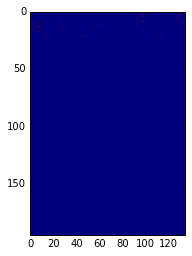

In [45]:
print X_text_train[10]
plt.imshow(X_train[10])

'Hans Chemin-Petit'